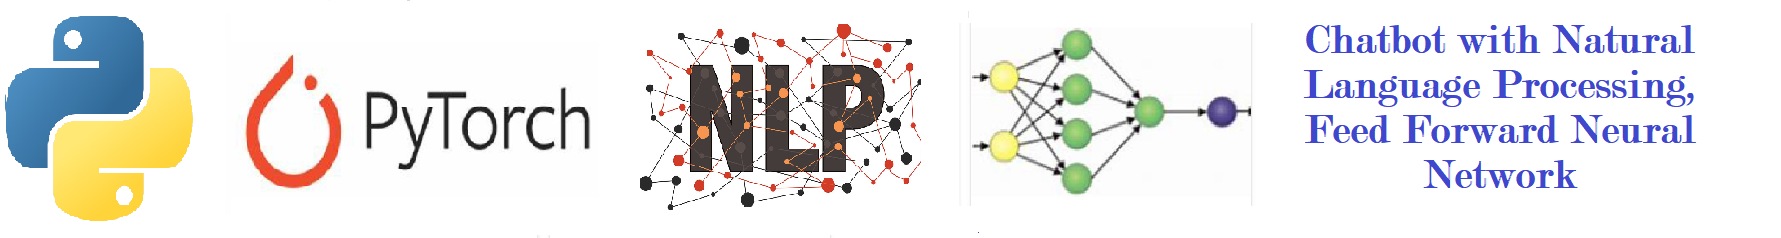

# Feed Forward Neural Net -  Chabot  - With Pytorch and Tensorflow
#### by Joe Eberle started on 06/23/2023 

### 1) NLP Concepts - (Stemming, Tolkenization, Bag of Words)
### 2) Create Training Model 
### 3) Pytorch model and Training
### 4) Save and Load Model and Implement Chat

In [1]:
# import the libraries necessary for the process 
# nltk.download('punkt') #  the pre-built nltk tokenizer teaches the NLTK library
import os, glob
from shutil import copyfile, copytree 
import schedule 
import file_manager as fm 
import nltk
import nltk_utils as nu
import json
import numpy as np

## Optional Step 0 - Intitiate Configuration Settings and name the overall solution

In [2]:
import configparser 
config = configparser.ConfigParser()
cfg = config.read('config.ini')  
solution_name = 'pytorch chatbot'
cwd = os.getcwd() 

## Optional Step 0 - Initiate logging 

In [3]:
# Establish the Python Logger  
import logging # built in python library that does not need to be installed 
import quick_logger as ql

global start_stime 
start_time = ql.set_start_time()
logging = ql.create_logger_Start(solution_name, start_time) 

# Tokenizing
## Optional Step 0 - Test the NLTK Tokenizing Utility

In [4]:
testing_and_developing = True

if testing_and_developing:
    test_sentence_1 = "What is the Transtheorectical Model ?  . "
    test_sentence_2 = "In the transtheoretical model, change is a process involving progress through a series of stages. "
    test_sentence_3 = "The stages are precontemplation, contemplation, preparation, action, maintenance. "  
    
    tokenized_sentence = nu.tokenize(test_sentence_1)
    print(f"\nTokenized Sentence: {tokenized_sentence} ")
    tokenized_sentence = nu.tokenize(test_sentence_2)
    print(f"\nTokenized Sentence: {tokenized_sentence} ")
    tokenized_sentence = nu.tokenize(test_sentence_3)
    print(f"\nTokenized Sentence: {tokenized_sentence} ") 


Tokenized Sentence: ['What', 'is', 'the', 'Transtheorectical', 'Model', '?', '.'] 

Tokenized Sentence: ['In', 'the', 'transtheoretical', 'model', ',', 'change', 'is', 'a', 'process', 'involving', 'progress', 'through', 'a', 'series', 'of', 'stages', '.'] 

Tokenized Sentence: ['The', 'stages', 'are', 'precontemplation', ',', 'contemplation', ',', 'preparation', ',', 'action', ',', 'maintenance', '.'] 


# Stemming
## Optional Step 0 - Test the NLTK Stemming Utility

In [5]:
testing_and_developing = True

if testing_and_developing:
  
    words_to_stem = ["Organizes","runner","organizing","biking","running"]
    stemmed_words = [nu.stem(w) for w in words_to_stem]
    
    for words in stemmed_words:
        print(F"\nStem: {words}")


Stem: organ

Stem: runner

Stem: organ

Stem: bike

Stem: run


## Optional Step 0 - Test the NLTK Utilities - Tokenizing 

In [6]:
developing_and_testing = True 

if developing_and_testing: 
    with open('intents.json', 'r') as f:
        intents = json.load(f) 
 
    print(intents)    

{'intents': [{'tag': 'greeting', 'patterns': ['Hello', 'Hi', 'Hey', 'Greetings'], 'responses': ['Hi there! How can I assist you today?', 'Hello! How can I help you?', 'Hey! How can I assist you today?']}, {'tag': 'goodbye', 'patterns': ['Goodbye', 'Bye', 'See you later', 'Take care'], 'responses': ['Goodbye! Have a great day!', 'Bye! Take care!', 'See you later! Take care!']}, {'tag': 'thanks', 'patterns': ['Thank you', 'Thanks', 'Appreciate it'], 'responses': ["You're welcome! Happy to help.", 'No problem! Let me know if you need anything else.', 'Glad I could assist you!']}, {'tag': 'help', 'patterns': ['Help', 'Can you assist me?', 'I need help'], 'responses': ['Of course! What do you need help with?', "Sure, I'm here to assist. What can I do for you?", "I'll do my best to help you. What do you need assistance with?"]}]}


In [7]:
# !pip install torch 
# !pip install torchvision  
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [9]:
import json
import numpy as np

with open('intents.json', 'r') as f:
    intents = json.load(f) 
          
all_words = []
tags = []
xy = [] 
          
for intent in intents['intents']:
    tag  = intent['tag']
    tags.append(tag)
    for pattern in intent['patterns']:
        w = nu.tokenize(pattern)
        all_words.extend(w) 
        xy.append((w,tag))
        
ignore_words = ['?','.','!',',']     

all_words = [nu.stem(w) for w in all_words if w not in ignore_words]
all_words = sorted(set(all_words)) 
tags = sorted(set(tags))

x_train = []
y_train = [] 
for (pattern_sentence, tag) in xy:
    bag = nu.bag_of_words(pattern_sentence, all_words)
    x_train.append(bag)
    
    label = tags.index(tag)    
    y_train.append(label) # CrosssEntropyLoss
    
x_train = np.array(x_train)
y_train = np.array(y_train)
          
class ChatDataset(dataset):
    def __init__(self):
        self.n_samples = len(x_train) 
        self.x_data = x_train
        self.y_data = y_train
        
    def __getitem__(self,index):
        return self.x_data[index], self.y_data[index]
    
    def __len__(self):
        return self.n_samples
    
# Hyperparamters 
batchsize = 8
hidden_size = 8
output_size = len(tags)
input_size = len(x_train[0]) 
learning_rate = 0.001
num_epochs = 1000

    
dataset = ChatDataset()
train_loader = DataLOader(dataset=dataset, batch_size=batch_size, shuffle=True, num_workers=2)

device = torch.device('cuda' if Torch.cuda.is_availablr() else 'cpu')
model = NeuralNet(input_size, hidden_size, output_size).to(device)

# loss and optimaizer 
criterion = nn.CrossEntropyLoss() 
optimizer = torch.optim.Adam(model.parameter, lr=learning_rate) 

for epoch in range(num_epochs): 
    for (words, labels) in train_lkoader:
        words = words.to(device)
        labels = labels.to(device) 
        
        # forward 
        outputs = model(words)
        loss = criterion(output, labels)
        
        #backward and optimizer step 
        optimizer.zero_grad()
        loss.backward() 
        optimizer.step() 
        
    if (epoch + 1) % 100 == 0:
        print(f'epoch {epoch+1}/{num_epochs}, loss={loss.item():.4f}')
        
        
print(f'final loss, loss={loss.item():.4f}')       

data = {
    "model_state", model.state_dict(),
    "input_size", input_size,
    "output_size", output_size,    
    "hidden_size", hidden_size,  
    "all_words", all_words,        
    "tags", tags
}



file_name = "data.pth"
torch.save(data ,file_name)

print(f"training completes. filesaved to {file_name}")


NameError: name 'dataset' is not defined

In [10]:
class ChatDataset(dataset):
    def __init__(self):
        self.n_samples = len(x_train) 
        self.x_data = x_train
        self.y_data = y_train
        
    def __getitem__(self,index):
        return self.x_data[index], self.y_data[index]
    
    def __len__(self):
        return self.n_samples

NameError: name 'dataset' is not defined

In [ ]:
import json
import numpy as np

with open('intents.json', 'r') as f:
    intents = json.load(f) 
          
all_words = []
tags = []
xy = [] 
          
for intent in intents['intents']:
    tag  = intent['tag']
    tags.append(tag)
    for pattern in intent['patterns']:
        w = nu.tokenize(pattern)
        all_words.extend(w) 
        xy.append((w,tag))
        
ignore_words = ['?','.','!',',']     

all_words = [nu.stem(w) for w in all_words if w not in ignore_words]
all_words = sorted(set(all_words)) 
tags = sorted(set(tags))

x_train = []
y_train = [] 
for (pattern_sentence, tag) in xy:
    bag = bag_of_words(pattern_sentence, all_words)
    x_train.append(bag)
    
    label = tags.index(tag)    
    y_train.append(label) # CrosssEntropyLoss
    
x_train = np.array(x_train)
y_train = np.array(y_train)
          
class ChatDataset(Dataset):
    def __init__(self):
        self.n_samples = len(x_train) 
        self.x_data = x_train
        self.y_data = y_train
        
    def __getitem__(self,index):
        return self.x_data[idx], self.y_data[idx]
    
    def __len__(self):
        return self.n_samples
    
# Hyperparamters 
batchsize = 8

    
dataset = ChatDataset()
train_loader = DataLOader(dataset=dataset, batch_size=batch_size, shuffle=True, num_workers=2)
        
        

In [ ]:
import random
import json 
import torch
from model import NueralNet 
from nltk_utils import bag_of_words, tokenize 

device = =torch.device('cuda' if torch.data.is_available() else 'cpu')

with open('intents.json', 'r') as f:
    intents = json.load(f)
    
file_name = "data.pth" 
data = torch.load(file_name)

input_size = data["input_size"]
hidden_size = data["hidden_size"]
output_size = data["output_size"]
all_words = data["all_words"]
tags = data["tags"]
model_state = data["model_state"]


model = NeuralNet(input_size, hidden_size, output_size).to(device) 
model.load_State_dict(model_State) 
model.eval() 

bot_anme = 'ai_health_coach'
print(f"Let's chat! type 'quit' to exit") 

while True:
    user_sentence = input("you: ")
    if user_sentence.lower() == "quit":
        break
        
    user_sentence = tokenize(user_sentence)
    x = bag_of_words(user_sentence, all_words) 
    x = x.reshape(1, x.shape[0])
    x = torch.numpy() 
    
    output = model(x)
    _, predicted = torch.max(output, dim = 1) 
    tag = tags[predicted.item()]
    
    probs = torch.softmax(output, dim=1)
    prob = probs[0][predicted_item()] 
    
    if prob.item() > 0.75:
        for intent in intents["intents"]:
            if tag == intent["tag"]:
                print(f"{bot_name}: {random.choice(intent{"responses"])}") 
     else:
        print(f"{bot_name}: I do not understand... Please retry")            